# 範例

In [1]:
## 確認硬體資源
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [2]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0721 21:35:02.181494  8592 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 21:35:02.247246  8592 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 21:35:02.260097  8592 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [12]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [13]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0721 21:35:23.812308  8592 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0721 21:35:23.834040  8592 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [14]:

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0721 21:35:30.433469  8592 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0721 21:35:30.593042  8592 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 210us/step - loss: 1.9697 - acc: 0.2911 - val_loss: 1.8107 - val_acc: 0.3606
Epoch 2/100
50000/50000 [==============================] - 6s 112us/step - loss: 1.7345 - acc: 0.3780 - val_loss: 1.6455 - val_acc: 0.4082
Epoch 3/100
50000/50000 [==============================] - 6s 111us/step - loss: 1.6304 - acc: 0.4170 - val_loss: 1.6131 - val_acc: 0.4231
Epoch 4/100
50000/50000 [==============================] - 5s 109us/step - loss: 1.5689 - acc: 0.4436 - val_loss: 1.5772 - val_acc: 0.4421
Epoch 5/100
50000/50000 [==============================] - 5s 106us/step - loss: 1.5135 - acc: 0.4598 - val_loss: 1.4948 - val_acc: 0.4705
Epoch 6/100
50000/50000 [==============================] - 6s 119us/step - loss: 1.4822 - acc: 0.4727 - val_loss: 1.4832 - val_acc: 0.4669
Epoch 7/100
50000/50000 [==============================] - 6s 114us/step - loss: 1.4462 - acc: 0.4826 - val_loss: 1

50000/50000 [==============================] - 5s 93us/step - loss: 0.6057 - acc: 0.7832 - val_loss: 1.8547 - val_acc: 0.5172
Epoch 60/100
50000/50000 [==============================] - 5s 95us/step - loss: 0.5987 - acc: 0.7865 - val_loss: 1.8871 - val_acc: 0.5096
Epoch 61/100
50000/50000 [==============================] - 5s 104us/step - loss: 0.5882 - acc: 0.7905 - val_loss: 1.9409 - val_acc: 0.5098
Epoch 62/100
50000/50000 [==============================] - 5s 97us/step - loss: 0.5666 - acc: 0.7991 - val_loss: 1.9446 - val_acc: 0.5133
Epoch 63/100
50000/50000 [==============================] - 5s 92us/step - loss: 0.5603 - acc: 0.7994 - val_loss: 1.9416 - val_acc: 0.5145
Epoch 64/100
50000/50000 [==============================] - 5s 93us/step - loss: 0.5601 - acc: 0.8007 - val_loss: 1.9319 - val_acc: 0.5160
Epoch 65/100
50000/50000 [==============================] - 5s 94us/step - loss: 0.5592 - acc: 0.7979 - val_loss: 2.0125 - val_acc: 0.5101
Epoch 66/100
50000/50000 [=============

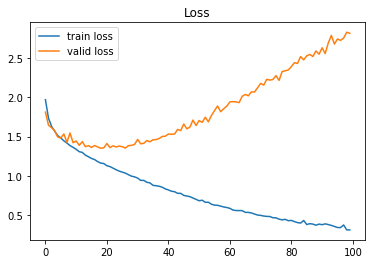

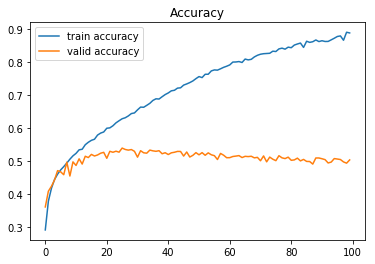

In [16]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

# Homework
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

## 以每筆資料的 min/max 進行標準化至 -1 ~ 1 

In [17]:
train, test = keras.datasets.cifar10.load_data()

In [18]:
## 資料前處理
def preproc_x(x, flatten = True):
    if flatten:
        x = x.astype(float).reshape((x.shape[0],-1))
    for i in range(x.shape[0]):
        x_min, x_max = x[i,:].min(), x[i,:].max()
        x[i,:] = (((x[i,:]-x_min)/(x_max-x_min))-0.5)*2
    return x

def preproc_y(y, num_classes = 10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes=num_classes)
    return y

In [19]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

## 將 mlp 疊更深

In [21]:
def build_mlp(input_shape, num_classes, num_neurons = [1024, 512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(n, activation='relu', name = 'hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(n, activation='relu', name = 'hidden_layer'+str(i+1))(x)
    
    out = keras.layers.Dense(num_classes, activation='softmax', name = 'Output')(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    return model

model = build_mlp(x_train.shape[1:], y_train.shape[-1])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 32)                2080      
__________

In [22]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [23]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [24]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 182us/step - loss: 1.7065 - acc: 0.3927 - val_loss: 1.5201 - val_acc: 0.4563
Epoch 2/100
50000/50000 [==============================] - 8s 151us/step - loss: 1.4706 - acc: 0.4787 - val_loss: 1.4587 - val_acc: 0.4859
Epoch 3/100
50000/50000 [==============================] - 7s 146us/step - loss: 1.3426 - acc: 0.5239 - val_loss: 1.3984 - val_acc: 0.5066
Epoch 4/100
50000/50000 [==============================] - 7s 145us/step - loss: 1.2490 - acc: 0.5585 - val_loss: 1.3799 - val_acc: 0.5139
Epoch 5/100
50000/50000 [==============================] - 7s 147us/step - loss: 1.1591 - acc: 0.5911 - val_loss: 1.3556 - val_acc: 0.5272
Epoch 6/100
50000/50000 [==============================] - 7s 148us/step - loss: 1.0726 - acc: 0.6222 - val_loss: 1.3443 - val_acc: 0.5428
Epoch 7/100
50000/50000 [==============================] - 8s 150us/step - loss: 0.9763 - acc: 0.6561 - val_loss: 1.

50000/50000 [==============================] - 8s 150us/step - loss: 0.0761 - acc: 0.9755 - val_loss: 3.4446 - val_acc: 0.5489
Epoch 60/100
50000/50000 [==============================] - 8s 151us/step - loss: 0.0715 - acc: 0.9777 - val_loss: 3.3922 - val_acc: 0.5514
Epoch 61/100
50000/50000 [==============================] - 8s 151us/step - loss: 0.0812 - acc: 0.9737 - val_loss: 3.2490 - val_acc: 0.5429
Epoch 62/100
50000/50000 [==============================] - 8s 151us/step - loss: 0.0729 - acc: 0.9764 - val_loss: 3.4501 - val_acc: 0.5445
Epoch 63/100
50000/50000 [==============================] - 8s 151us/step - loss: 0.0710 - acc: 0.9774 - val_loss: 3.4492 - val_acc: 0.5459
Epoch 64/100
50000/50000 [==============================] - 8s 152us/step - loss: 0.0689 - acc: 0.9780 - val_loss: 3.4360 - val_acc: 0.5433
Epoch 65/100
50000/50000 [==============================] - 8s 151us/step - loss: 0.0718 - acc: 0.9773 - val_loss: 3.4239 - val_acc: 0.5536
Epoch 66/100
50000/50000 [=======

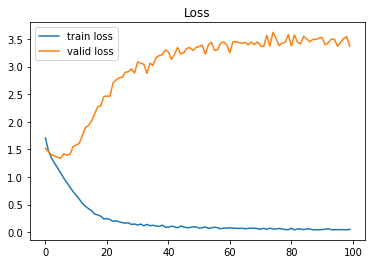

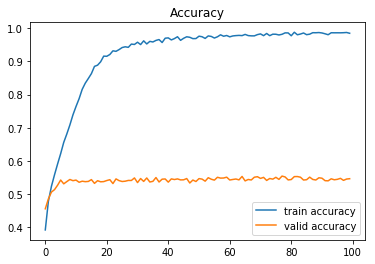

In [26]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()